In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
pd.set_option('display.max_colwidth', 15)

In [2]:
df = pd.read_csv('../data/df_subvar.csv')

In [3]:
#df = df.loc[(df['WhiteElo'] >= 2500) | (df['WhiteElo'].isna())]
#df = df.loc[(df['BlackElo'] >= 2500) | (df['BlackElo'].isna())]

In [4]:
df = df.sort_values('SubVariation')
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2774,1834380,Pere Noel O...,Montreal,2018,"Li,Yilin","Craciun,David",1-0,1727.0,C89,1899.0,1,0,41,8,5,13,0,"[23, 46, 30...",971,-58,946,6,8,11,5,4,0,0,8,8,9,7,7,1,0,21982,-58,21924,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2361,1550167,5th Alajuel...,Alajuela,2014,"Cabrera,Ma",Perez Rodri...,0-1,2388.0,C89,2139.0,0,1,50,2,4,6,1,"[25, 61, 36...",99,-1212,-1212,16,10,7,5,4,2,0,22,17,3,7,0,0,0,966,-13782,-12816,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2794,1848445,ch-Moscow F...,Moscow,2019,"Yakimenko,Alex","Kireev,Igor",1-0,1673.0,C89,2185.0,1,0,31,8,6,14,0,"[20, 46, 53...",99996,-16,99995,12,5,3,5,1,1,1,11,2,3,4,5,4,1,1017902,-26,1017876,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,626371,Kassel op,Kassel,1994,"Wendland, J...","Schuchardt,...",1/2-1/2,NaN,C89,NaN,0,0,22,9,9,18,1,"[21, 42, 50...",145,-117,127,8,6,2,0,2,0,0,9,5,3,2,2,0,0,1589,-406,1183,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
384,247906,Dubai ol (Men),Dubai,1986,"Santacruz, ...","Defize, Alain",1/2-1/2,2380.0,C89,NaN,0,0,46,11,10,21,0,"[26, 41, 42...",746,-528,651,7,3,2,6,3,14,7,7,2,1,6,7,14,8,18493,-1441,17052,1. e4 e5 2....,9. h3 Bb7,"['e4', 'e5'..."
2497,1641589,1st Patagon...,Neuquen,2015,"Zoratti,Seb...","Della Morte,G",0-1,2421.0,C89,1843.0,0,1,30,8,8,16,0,"[28, 62, 47...",767,-937,-873,3,4,0,5,3,6,2,14,0,1,5,2,5,2,3767,-15082,-11315,1. e4 e5 2....,9. h3 Na5,"['e4', 'e5'..."
1129,747453,CRO-chT2,Tucepi,1996,"Jelic, J.","Sertic, Rudolf",0-1,NaN,C89,NaN,0,1,22,11,12,23,0,"[27, 44, 54...",59,-99995,-99995,10,2,1,0,3,3,1,13,5,0,2,1,0,0,691,-213600,-212909,1. e4 e5 2....,9. h3 dxe4,"['e4', 'e5'..."


In [5]:
df['SubVariation'].unique()

array(['9. Bc2 dxe4', '9. d3 Bb7', '9. d3 Bg4', '9. d3 Qd6', '9. d3 d4',
       '9. d3 dxe4', '9. d3 h6', '9. d4 Bg4', '9. d4 Nxe4', '9. d4 dxe4',
       '9. d4 exd4', '9. exd5 Nxd5', '9. exd5 e4', '9. h3 Bb7',
       '9. h3 Na5', '9. h3 dxe4'], dtype=object)

C:\Users\edupo\AppData\Local\Temp\ipykernel_18428\2469112444.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


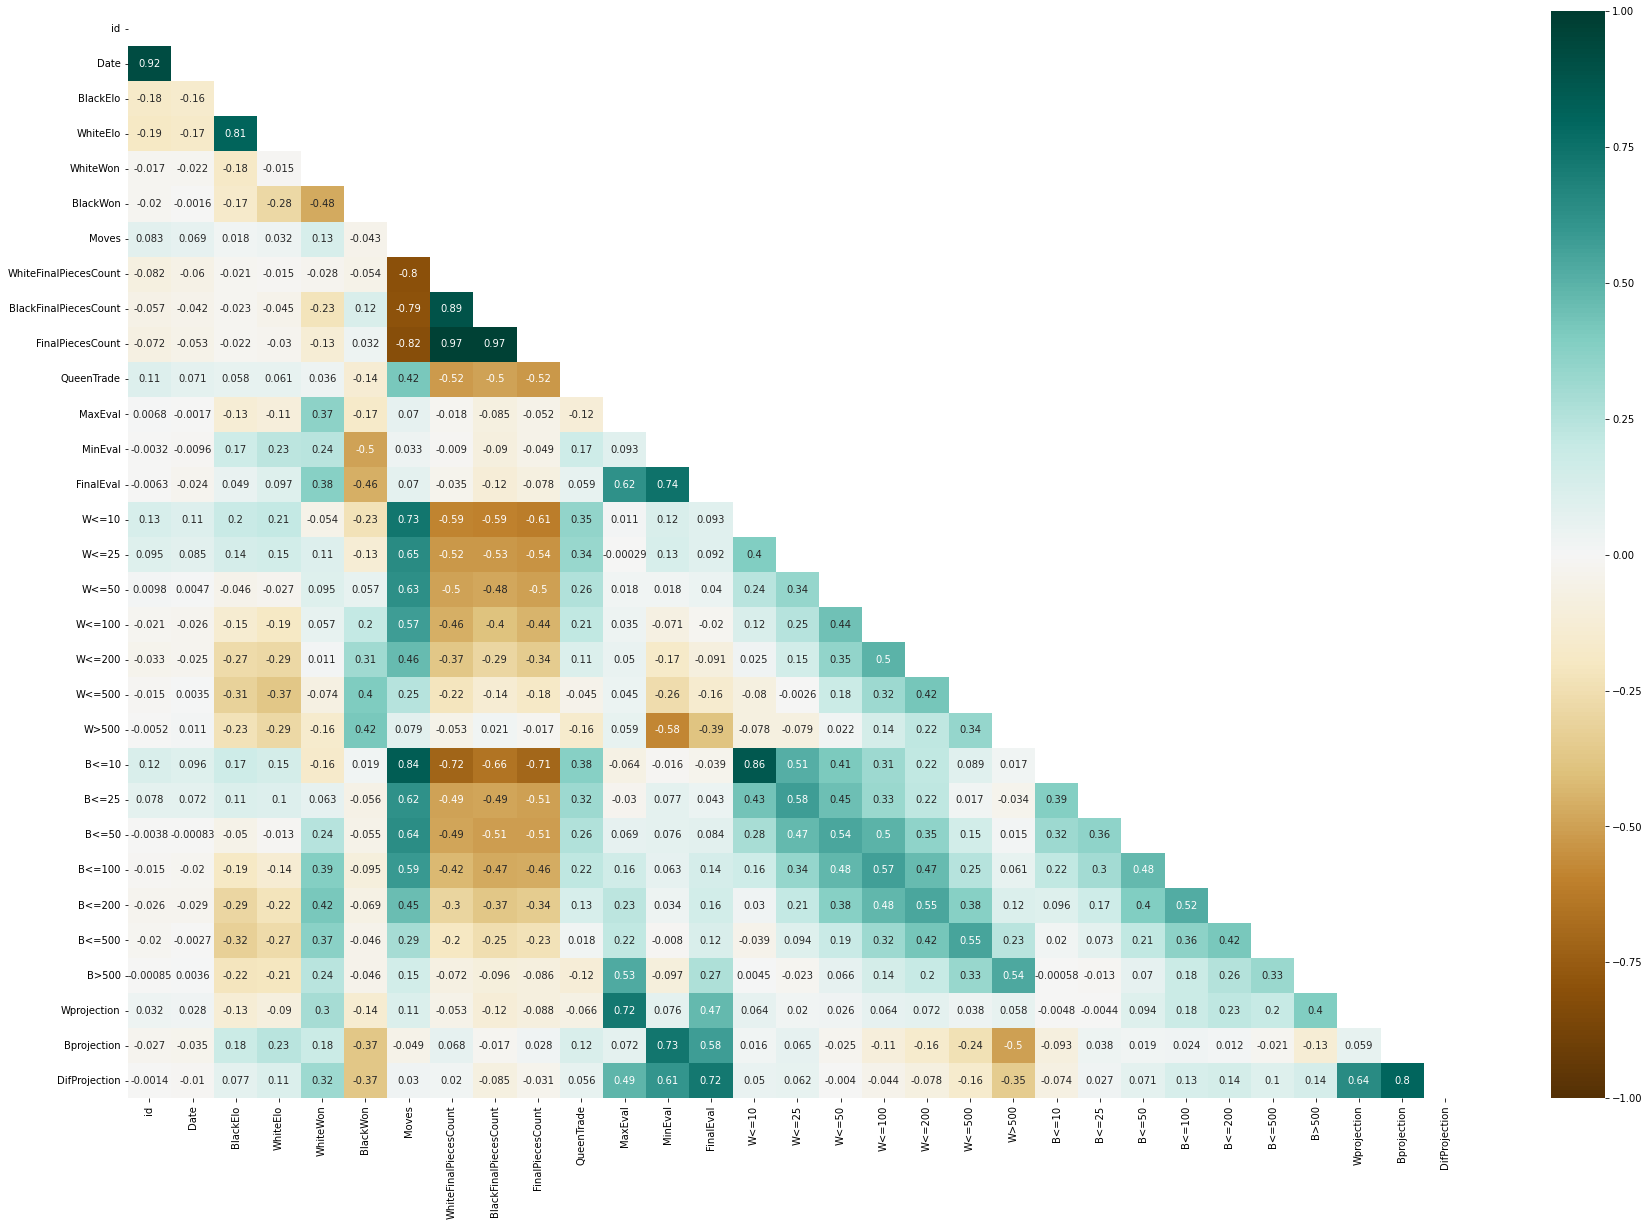

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('asd', fontdict={'fontsize':32}, pad=16);

<AxesSubplot:ylabel='DifProjection'>

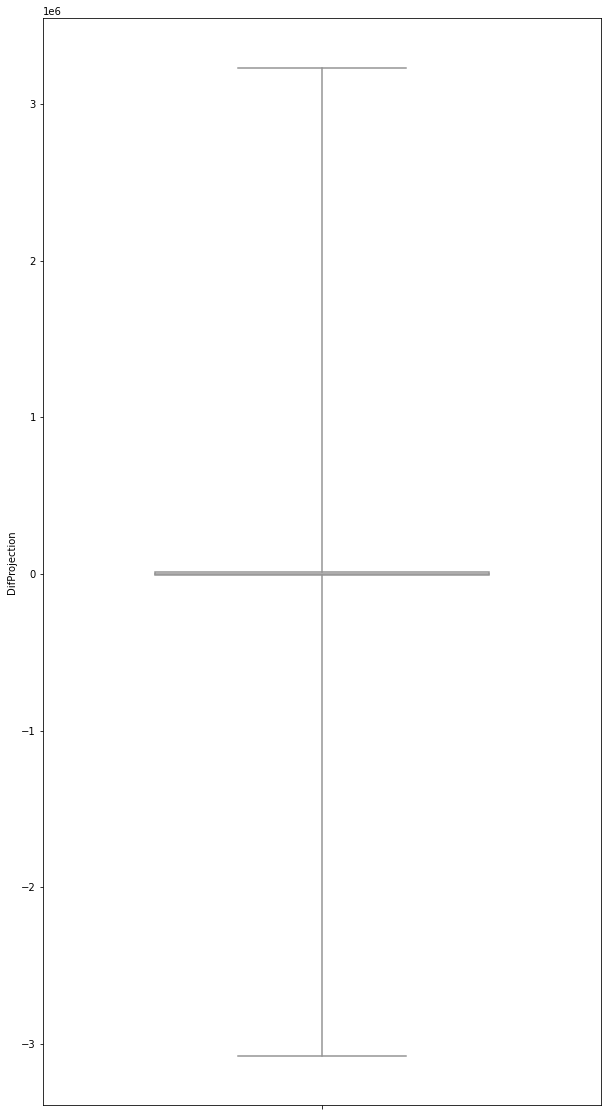

In [7]:
# Plot the orbital period with horizontal boxes
fig, ax = plt.subplots(1,1, figsize=(10,20))

sns.boxplot(y="DifProjection", data=df,
            whis=[0, 100], width=0.6, palette="vlag", ax=ax)

<AxesSubplot:xlabel='Result', ylabel='Moves'>

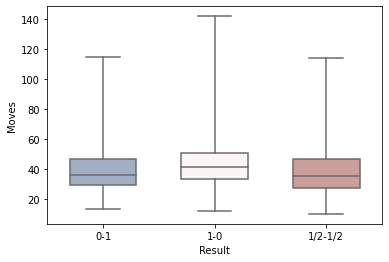

In [8]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Result", y="Moves", data=df,
            whis=[0, 100], width=.6, palette="vlag")

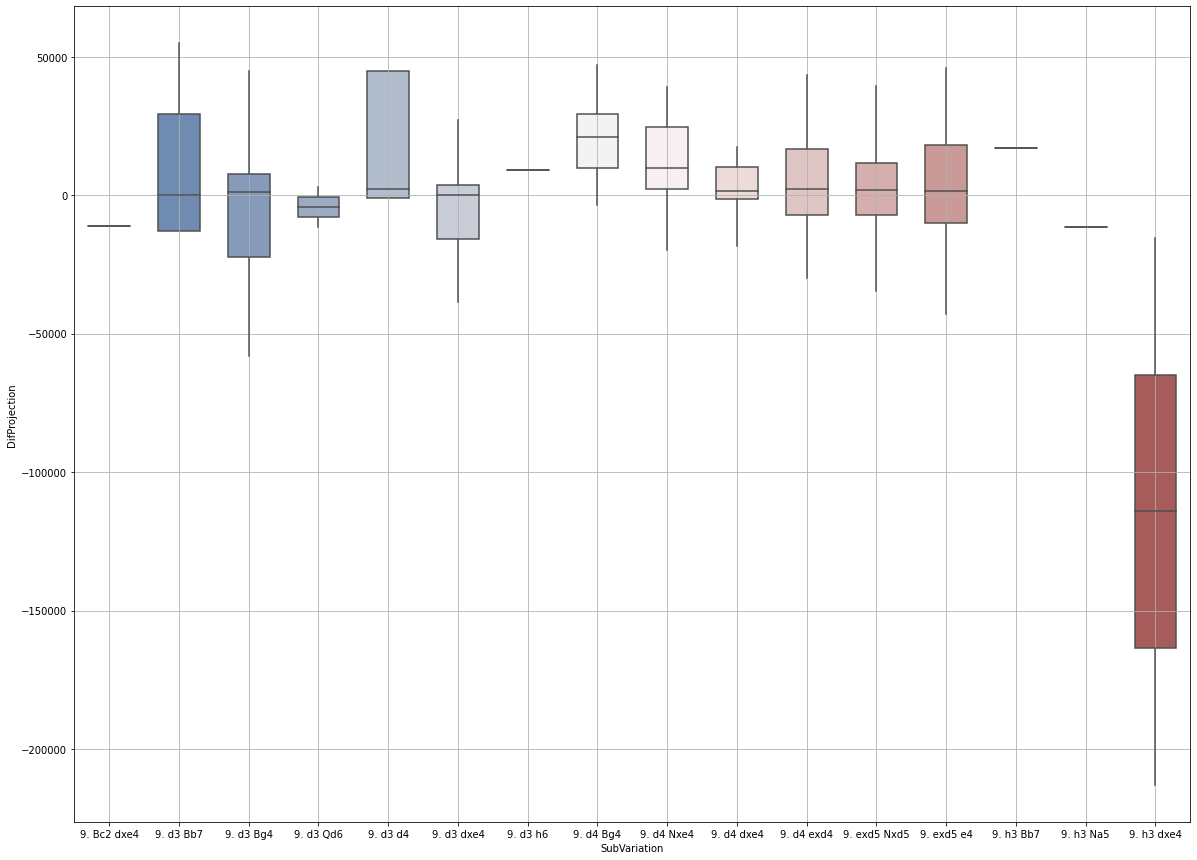

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="SubVariation", y="DifProjection", data=df,
            whis=1.5, width=.6, palette="vlag", ax=ax, showcaps=False, showfliers=False)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

In [10]:
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2774,1834380,Pere Noel O...,Montreal,2018,"Li,Yilin","Craciun,David",1-0,1727.0,C89,1899.0,1,0,41,8,5,13,0,"[23, 46, 30...",971,-58,946,6,8,11,5,4,0,0,8,8,9,7,7,1,0,21982,-58,21924,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2361,1550167,5th Alajuel...,Alajuela,2014,"Cabrera,Ma",Perez Rodri...,0-1,2388.0,C89,2139.0,0,1,50,2,4,6,1,"[25, 61, 36...",99,-1212,-1212,16,10,7,5,4,2,0,22,17,3,7,0,0,0,966,-13782,-12816,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
2794,1848445,ch-Moscow F...,Moscow,2019,"Yakimenko,Alex","Kireev,Igor",1-0,1673.0,C89,2185.0,1,0,31,8,6,14,0,"[20, 46, 53...",99996,-16,99995,12,5,3,5,1,1,1,11,2,3,4,5,4,1,1017902,-26,1017876,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,626371,Kassel op,Kassel,1994,"Wendland, J...","Schuchardt,...",1/2-1/2,NaN,C89,NaN,0,0,22,9,9,18,1,"[21, 42, 50...",145,-117,127,8,6,2,0,2,0,0,9,5,3,2,2,0,0,1589,-406,1183,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
384,247906,Dubai ol (Men),Dubai,1986,"Santacruz, ...","Defize, Alain",1/2-1/2,2380.0,C89,NaN,0,0,46,11,10,21,0,"[26, 41, 42...",746,-528,651,7,3,2,6,3,14,7,7,2,1,6,7,14,8,18493,-1441,17052,1. e4 e5 2....,9. h3 Bb7,"['e4', 'e5'..."
2497,1641589,1st Patagon...,Neuquen,2015,"Zoratti,Seb...","Della Morte,G",0-1,2421.0,C89,1843.0,0,1,30,8,8,16,0,"[28, 62, 47...",767,-937,-873,3,4,0,5,3,6,2,14,0,1,5,2,5,2,3767,-15082,-11315,1. e4 e5 2....,9. h3 Na5,"['e4', 'e5'..."
1129,747453,CRO-chT2,Tucepi,1996,"Jelic, J.","Sertic, Rudolf",0-1,NaN,C89,NaN,0,1,22,11,12,23,0,"[27, 44, 54...",59,-99995,-99995,10,2,1,0,3,3,1,13,5,0,2,1,0,0,691,-213600,-212909,1. e4 e5 2....,9. h3 dxe4,"['e4', 'e5'..."


In [11]:
df_resultcount = df.groupby(['SubVariation','Date'])['Result'].size().reset_index(name='GamesCount')
df_resultcount.sort_values(by='Date')

,SubVariation,Date,GamesCount
162,9. exd5 Nxd5,1918,2
163,9. exd5 Nxd5,1921,2
164,9. exd5 Nxd5,1926,1
165,9. exd5 Nxd5,1927,1
166,9. exd5 Nxd5,1928,1
...,...,...,...
33,9. d3 d4,2020,1
161,9. d4 exd4,2021,3
246,9. exd5 Nxd5,2021,49
127,9. d4 dxe4,2021,4


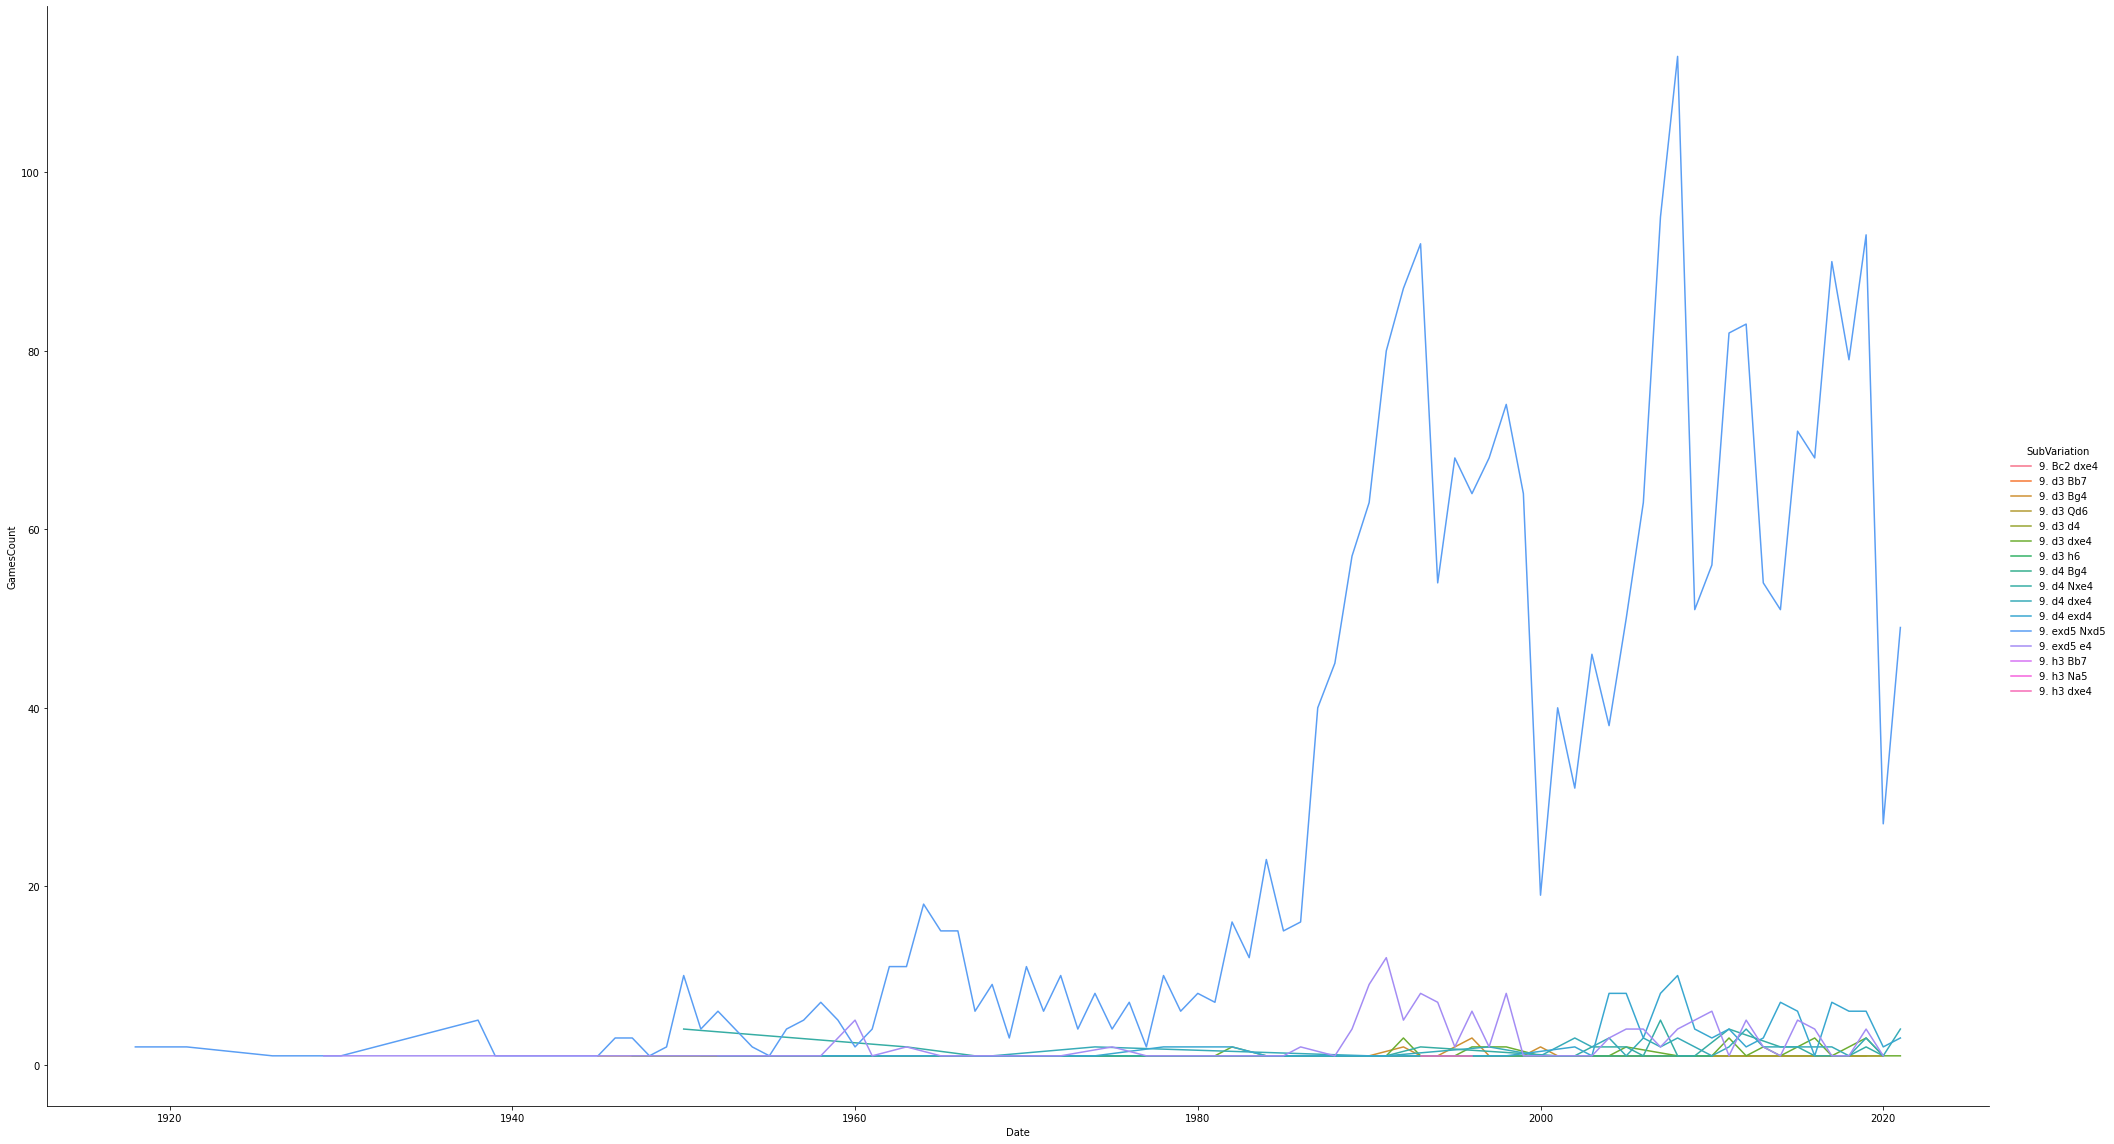

In [12]:
#fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.relplot(
    data=df_resultcount,
    x="Date", y="GamesCount",
    hue="SubVariation",
    kind="line",
    height=16, aspect=1.75,
)

In [13]:
df_resultcount.sort_values('Date')

,SubVariation,Date,GamesCount
162,9. exd5 Nxd5,1918,2
163,9. exd5 Nxd5,1921,2
164,9. exd5 Nxd5,1926,1
165,9. exd5 Nxd5,1927,1
166,9. exd5 Nxd5,1928,1
...,...,...,...
33,9. d3 d4,2020,1
161,9. d4 exd4,2021,3
246,9. exd5 Nxd5,2021,49
127,9. d4 dxe4,2021,4


In [14]:
df_resultcount = df_resultcount.sort_values(by='SubVariation')
df_resultcount['SubVariation'].unique().tolist()

['9. Bc2 dxe4',
 '9. d3 Bb7',
 '9. d3 Bg4',
 '9. d3 Qd6',
 '9. d3 d4',
 '9. d3 dxe4',
 '9. d3 h6',
 '9. d4 Bg4',
 '9. d4 Nxe4',
 '9. d4 dxe4',
 '9. d4 exd4',
 '9. exd5 Nxd5',
 '9. exd5 e4',
 '9. h3 Bb7',
 '9. h3 Na5',
 '9. h3 dxe4']

In [15]:
df_resultcount = df_resultcount.sort_values(by='Date')
df_resultcount_var1 = df_resultcount.loc[df_resultcount['SubVariation'] == '9. Bc2 dxe4']
df_resultcount_var2 = df_resultcount.loc[df_resultcount['SubVariation'] == '9. d3 Bb7']
df_resultcount_var3 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 Bg4']
df_resultcount_var4 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 Qd6']
df_resultcount_var5 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 d4']
df_resultcount_var6 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 dxe4']
df_resultcount_var7 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 h6']
df_resultcount_var8 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 Bg4']
df_resultcount_var9 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 Nxe4']
df_resultcount_var10 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 dxe4']
df_resultcount_var11 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 exd4']
df_resultcount_var12 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. exd5 Nxd5']
df_resultcount_var13 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. exd5 e4']
df_resultcount_var14 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 Bb7']
df_resultcount_var15 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 Na5']
df_resultcount_var16 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 dxe4']

In [16]:
df_resultcount_var12

,SubVariation,Date,GamesCount
162,9. exd5 Nxd5,1918,2
163,9. exd5 Nxd5,1921,2
164,9. exd5 Nxd5,1926,1
165,9. exd5 Nxd5,1927,1
166,9. exd5 Nxd5,1928,1
...,...,...,...
242,9. exd5 Nxd5,2017,90
243,9. exd5 Nxd5,2018,79
244,9. exd5 Nxd5,2019,93
245,9. exd5 Nxd5,2020,27


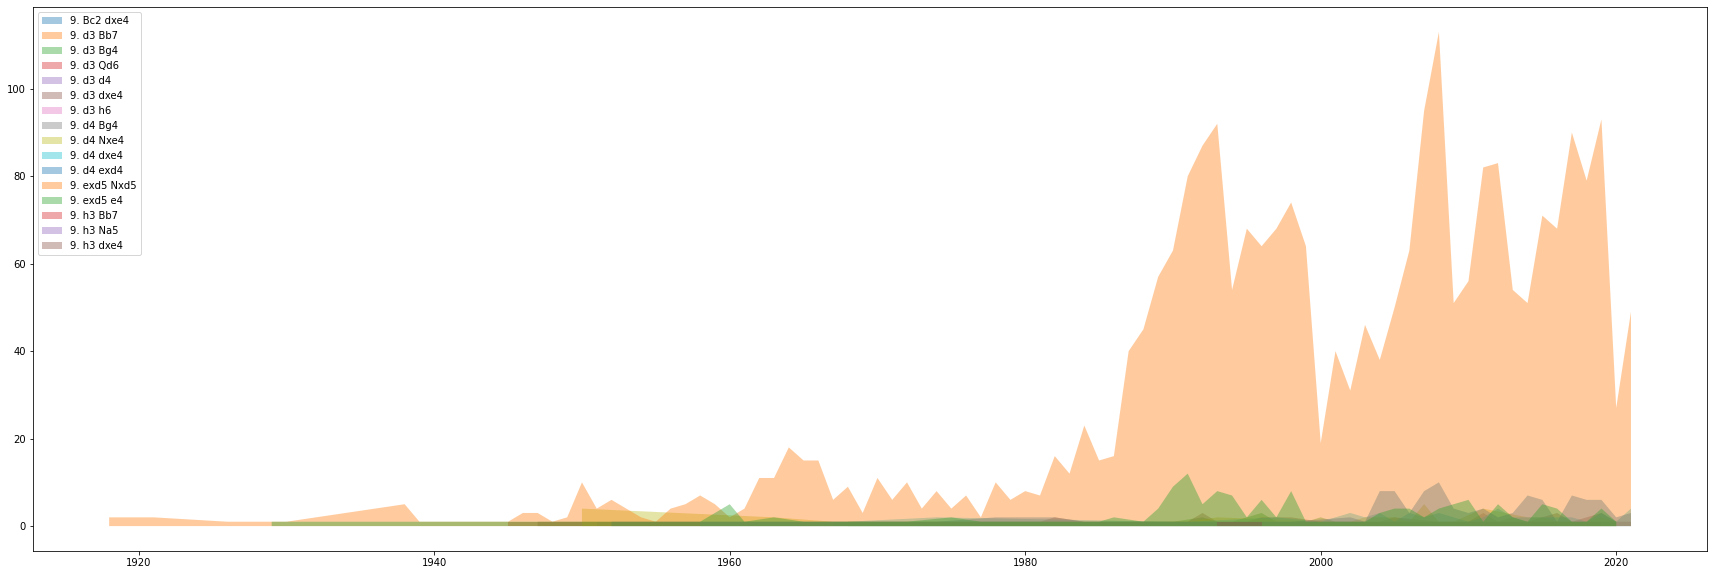

In [27]:
fig, ax = plt.subplots(1, figsize=(30,10))
ax.fill_between(df_resultcount_var1['Date'], df_resultcount_var1['GamesCount'], facecolor='C0', alpha=0.4, label='9. Bc2 dxe4')
ax.fill_between(df_resultcount_var2['Date'], df_resultcount_var2['GamesCount'], facecolor='C1', alpha=0.4, label='9. d3 Bb7')
ax.fill_between(df_resultcount_var3['Date'], df_resultcount_var3['GamesCount'], facecolor='C2', alpha=0.4, label='9. d3 Bg4')
ax.fill_between(df_resultcount_var4['Date'], df_resultcount_var4['GamesCount'], facecolor='C3', alpha=0.4, label='9. d3 Qd6')
ax.fill_between(df_resultcount_var5['Date'], df_resultcount_var5['GamesCount'], facecolor='C4', alpha=0.4, label='9. d3 d4')
ax.fill_between(df_resultcount_var6['Date'], df_resultcount_var6['GamesCount'], facecolor='C5', alpha=0.4, label='9. d3 dxe4')
ax.fill_between(df_resultcount_var7['Date'], df_resultcount_var7['GamesCount'], facecolor='C6', alpha=0.4, label='9. d3 h6')
ax.fill_between(df_resultcount_var8['Date'], df_resultcount_var8['GamesCount'], facecolor='C7', alpha=0.4, label='9. d4 Bg4')
ax.fill_between(df_resultcount_var9['Date'], df_resultcount_var9['GamesCount'], facecolor='C8', alpha=0.4, label='9. d4 Nxe4')
ax.fill_between(df_resultcount_var10['Date'], df_resultcount_var10['GamesCount'], facecolor='C9', alpha=0.4, label='9. d4 dxe4')
ax.fill_between(df_resultcount_var11['Date'], df_resultcount_var11['GamesCount'], facecolor='C10', alpha=0.4, label='9. d4 exd4')
ax.fill_between(df_resultcount_var12['Date'], df_resultcount_var12['GamesCount'], facecolor='C11', alpha=0.4, label='9. exd5 Nxd5')
ax.fill_between(df_resultcount_var13['Date'], df_resultcount_var13['GamesCount'], facecolor='C12', alpha=0.4, label='9. exd5 e4')
ax.fill_between(df_resultcount_var14['Date'], df_resultcount_var14['GamesCount'], facecolor='C13', alpha=0.4, label='9. h3 Bb7')
ax.fill_between(df_resultcount_var15['Date'], df_resultcount_var15['GamesCount'], facecolor='C14', alpha=0.4, label='9. h3 Na5')
ax.fill_between(df_resultcount_var16['Date'], df_resultcount_var16['GamesCount'], facecolor='C15', alpha=0.4, label='9. h3 dxe4')
ax.legend(loc='upper left')

In [18]:
df_resultcount

,SubVariation,Date,GamesCount
162,9. exd5 Nxd5,1918,2
163,9. exd5 Nxd5,1921,2
164,9. exd5 Nxd5,1926,1
165,9. exd5 Nxd5,1927,1
166,9. exd5 Nxd5,1928,1
...,...,...,...
126,9. d4 dxe4,2020,1
161,9. d4 exd4,2021,3
127,9. d4 dxe4,2021,4
246,9. exd5 Nxd5,2021,49


In [34]:
#set index pro q quer organizar
df_resultcount2 = df_resultcount.copy()
df_resultcount2['tot'] = df_resultcount2['GamesCount']
df_resultcount2 = df_resultcount2.set_index('SubVariation', 'Date')
df_resultcount2['tot'] = df_resultcount2['tot'] + df_resultcount2['tot'].shift(1)
#df_resultcount2 = df_resultcount2.reset_index()
df_resultcount2

C:\Users\edupo\AppData\Local\Temp\ipykernel_18428\2580001751.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df_resultcount2 = df_resultcount2.set_index('SubVariation', 'Date')


,Date,GamesCount,tot
SubVariation,,,
9. exd5 Nxd5,1918,2,NaN
9. exd5 Nxd5,1921,2,4.0
9. exd5 Nxd5,1926,1,3.0
9. exd5 Nxd5,1927,1,2.0
9. exd5 Nxd5,1928,1,2.0
...,...,...,...
9. d4 dxe4,2020,1,2.0
9. d4 exd4,2021,3,4.0
9. d4 dxe4,2021,4,7.0


In [20]:
df_resultcount2

,Date,GamesCount,tot
SubVariation,,,
9. exd5 Nxd5,1918,2,NaN
9. exd5 Nxd5,1921,2,4.0
9. exd5 Nxd5,1926,1,3.0
9. exd5 Nxd5,1927,1,2.0
9. exd5 Nxd5,1928,1,2.0
...,...,...,...
9. d4 dxe4,2020,1,2.0
9. d4 exd4,2021,3,4.0
9. d4 dxe4,2021,4,7.0
